# Train models to predict Stock Price Movement Value

In [24]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

In [25]:
'''
Load the augmented stock dataset. Each row corresponds to a date, with all the ticker symbols accumulated
'''

df = pd.read_csv("../data/regression-task/master-regression-dataset.csv", sep=';', lineterminator='\n')
df = df.drop(labels=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'High', 'Low', 'Close', 'Open', 'Volume', 'Timestamp'], axis=1)
df.head()

,Delta,Volatility,AvgVolatility,Momentum,positive_sentiment
0,-0.631500,0.000000,0.0,0.0,0.469450
1,0.418999,-0.005044,0.0,1.0,0.423330
2,1.206997,-0.042437,0.0,1.0,0.486872
3,0.843002,0.005326,0.0,0.0,0.505960
4,-0.531502,-0.000792,0.0,1.0,0.433893


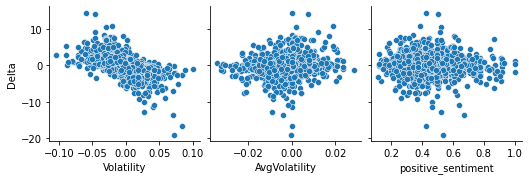

In [26]:
'''
Features to use for movement value prediction
'''

features = ['Volatility', 'AvgVolatility', 'positive_sentiment']


sns.pairplot(df, x_vars=features, y_vars='Delta')
# sns.pairplot(df, x_vars=features, y_vars='Momentum')

In [27]:
# Regression
X, y = df[features], df['Delta']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

(1675, 3) (1675,)


In [28]:
'''
Train linear regression model
'''

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 4.122078973187517


In [29]:
def plot_reg_learning_curve(reg, X, y):
    sample_points, train_scores, test_scores = learning_curve(estimator=reg, X=X, y=y, cv=10, scoring=make_scorer(mean_squared_error))
    train_scores = np.average(train_scores, axis=1)
    test_scores = np.average(test_scores, axis=1)

    print(sample_points)

    plt.plot(sample_points, train_scores, label='Train scores')
    plt.plot(sample_points, test_scores, label='Test scores')
    plt.legend()
    plt.grid()
    # plt.title(f"Logistic regression learning curve, C = {param}")
    plt.show()


def plot_svr_validation_curve(X, y, hyperparams: list, kernel='poly'):
    train_scores = []
    test_scores = []
    best_test_score = 0
    best_c = 1
    for c in hyperparams:
        clf = SVR(C=c, kernel=kernel)

        # get cross validation score
        # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
        cv_scores = cross_validate(clf, X, y, cv=10, error_score='raise', scoring=make_scorer(mean_squared_error), return_train_score=True)
        current_train_scores = cv_scores['train_score']
        current_test_scores = cv_scores['test_score']
        train_score = np.average(current_train_scores)
        test_score = np.average(current_test_scores)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"SVR-{kernel} with c {c} has mean validation train / test score of {train_score} / {test_score}")
        if best_test_score < test_score:
            best_test_score = test_score
            best_c = c


    plt.plot(hyperparams, train_scores, label='Train scores')
    plt.plot(hyperparams, test_scores, label='Test scores')
    plt.grid()
    plt.legend()
    plt.title(f"SVR-{kernel} validation curve")
    plt.show()

    return best_c

SVR-linear with c 0.2 has mean validation train / test score of 5.418881027840365 / 5.4193070841982145
SVR-linear with c 0.4 has mean validation train / test score of 5.23235119697142 / 5.235242812927975
SVR-linear with c 0.6 has mean validation train / test score of 5.087861718824162 / 5.095635044316946
SVR-linear with c 0.8 has mean validation train / test score of 4.967788861760385 / 4.976182317027096
SVR-linear with c 1 has mean validation train / test score of 4.866037876660294 / 4.880676866298073
SVR-linear with c 2 has mean validation train / test score of 4.517696768970716 / 4.548221616529995
SVR-linear with c 4 has mean validation train / test score of 4.231200050293919 / 4.271378643249852
SVR-linear with c 8 has mean validation train / test score of 4.062603397890524 / 4.125671993353161
SVR-linear with c 16 has mean validation train / test score of 3.942792462088602 / 4.024534481088301
SVR-linear with c 32 has mean validation train / test score of 3.8726704851972764 / 3.96713

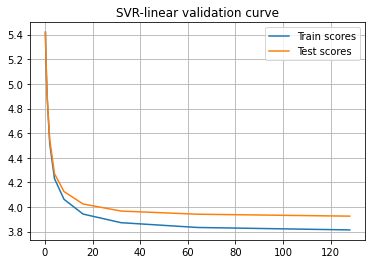

For kernel linear, best value for C: 0.2
[ 150  489  828 1167 1507]


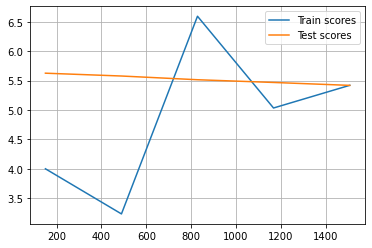

SVR-poly with c 0.2 has mean validation train / test score of 4.212596299421901 / 4.249960344633054
SVR-poly with c 0.4 has mean validation train / test score of 4.136175773785499 / 4.1876847629290666
SVR-poly with c 0.6 has mean validation train / test score of 4.10819025766492 / 4.169080134810572
SVR-poly with c 0.8 has mean validation train / test score of 4.094354223168234 / 4.156630532696214
SVR-poly with c 1 has mean validation train / test score of 4.083274886383278 / 4.149522790143412
SVR-poly with c 2 has mean validation train / test score of 4.06364202191058 / 4.1281306482085425
SVR-poly with c 4 has mean validation train / test score of 4.053925419036476 / 4.11866104370308
SVR-poly with c 8 has mean validation train / test score of 4.044982813508071 / 4.1188183404469
SVR-poly with c 16 has mean validation train / test score of 4.0406848607983115 / 4.114808179642933
SVR-poly with c 32 has mean validation train / test score of 4.037024484030146 / 4.10973348674071
SVR-poly with

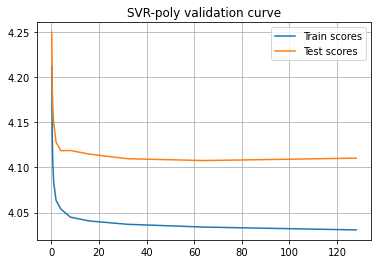

For kernel poly, best value for C: 0.2
[ 150  489  828 1167 1507]


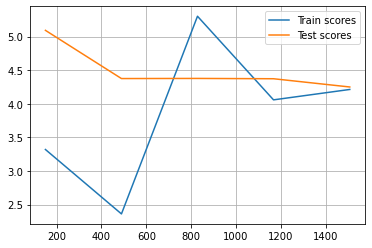

SVR-rbf with c 0.2 has mean validation train / test score of 4.483759505212132 / 4.524933255840902
SVR-rbf with c 0.4 has mean validation train / test score of 4.2263416459969205 / 4.266138243552836
SVR-rbf with c 0.6 has mean validation train / test score of 4.129508703994282 / 4.189309078829735
SVR-rbf with c 0.8 has mean validation train / test score of 4.064717328382167 / 4.128646682760946
SVR-rbf with c 1 has mean validation train / test score of 4.022472853232147 / 4.090459185493565
SVR-rbf with c 2 has mean validation train / test score of 3.9237204603456783 / 4.0185279610633815
SVR-rbf with c 4 has mean validation train / test score of 3.8563720000574646 / 3.976977563592384
SVR-rbf with c 8 has mean validation train / test score of 3.8137719897944145 / 3.9629123262115358
SVR-rbf with c 16 has mean validation train / test score of 3.7843256062585313 / 3.951095127793562
SVR-rbf with c 32 has mean validation train / test score of 3.7667605876824233 / 3.942432100854405
SVR-rbf with

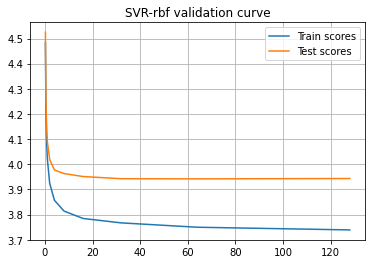

For kernel rbf, best value for C: 0.2
[ 150  489  828 1167 1507]


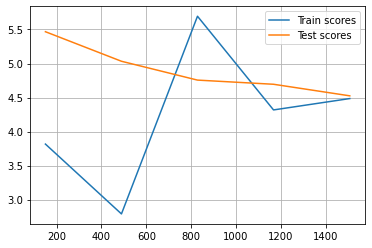

SVR-sigmoid with c 0.2 has mean validation train / test score of 39.90576572179962 / 42.00818258087288
SVR-sigmoid with c 0.4 has mean validation train / test score of 156.17841232845132 / 164.7690967582548
SVR-sigmoid with c 0.6 has mean validation train / test score of 349.1789788595145 / 368.96806213380125
SVR-sigmoid with c 0.8 has mean validation train / test score of 617.6832719213959 / 653.3266391938249
SVR-sigmoid with c 1 has mean validation train / test score of 961.3366223805066 / 1020.4281033302854
SVR-sigmoid with c 2 has mean validation train / test score of 3828.8087149740013 / 4053.5310603614475
SVR-sigmoid with c 4 has mean validation train / test score of 15278.668434691906 / 16180.30362438584
SVR-sigmoid with c 8 has mean validation train / test score of 61071.94741362686 / 64553.28377151168
SVR-sigmoid with c 16 has mean validation train / test score of 244270.1671353897 / 258332.73160327604
SVR-sigmoid with c 32 has mean validation train / test score of 976757.6127

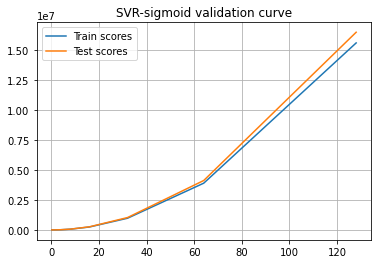

For kernel sigmoid, best value for C: 128
[ 150  489  828 1167 1507]


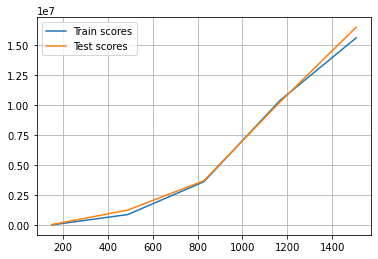

In [30]:
'''
Train using SVMs using different kernels
'''

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c_vals = [0.2, 0.4, 0.6, 0.8, 1, 2, 4, 8, 16, 32, 64, 128]

for kernel in kernels:
    best_c = plot_svr_validation_curve(X, y, c_vals, kernel=kernel)
    print("For kernel {}, best value for C: {}".format(kernel, best_c))
    plot_reg_learning_curve(SVR(C=best_c, kernel=kernel), X, y)